<a href="https://colab.research.google.com/github/db-malik/Basic-GraphQL/blob/main/Copie_de_TpML_Msc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tp Machine Learning**





## **Présentation du Jeu de données Iris**

Le jeu de données Iris a été initialement publié à l’ UCI Machine Learning Repository: Iris Data Set. Ce Data Set de 1936 est souvent utilisé pour tester des algorithmes d’apprentissage automatique et des visualisations.

Le jeu de données Iris contient trois variantes de la fleur Iris. Il contient 150 observations (ligne du jeu de donnée) réparties de manière égale entre les trois espèces de fleurs d'iris (setosa, virginica et versicolor). Quatre caractéristiques sont mesurées pour chaque observation (c.-à-d. la longueur et la largeur du sépale et du pétale, en centimètres).
Le jeu de données est étiquetée par le type de fleur. Ainsi pour quatre attributs décrivant une fleur d’Iris, on saura de quelle variante il s’agit.

Dans ce TP on va travailler sur le dataset Iris afin d'atteindre deux objectifs :


---


1/ Clustering du dataset Iris.  
2/ Classification des fleurs d'Iris.



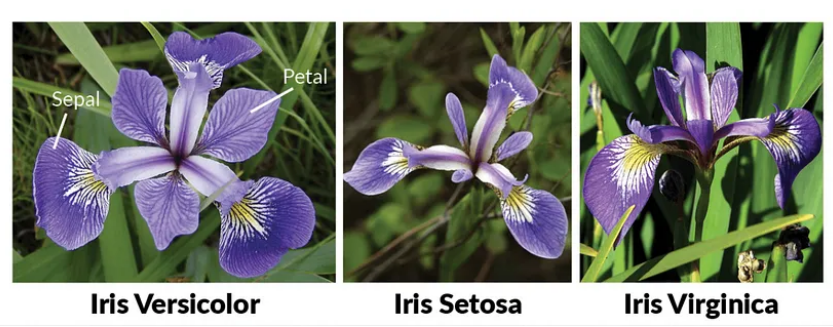

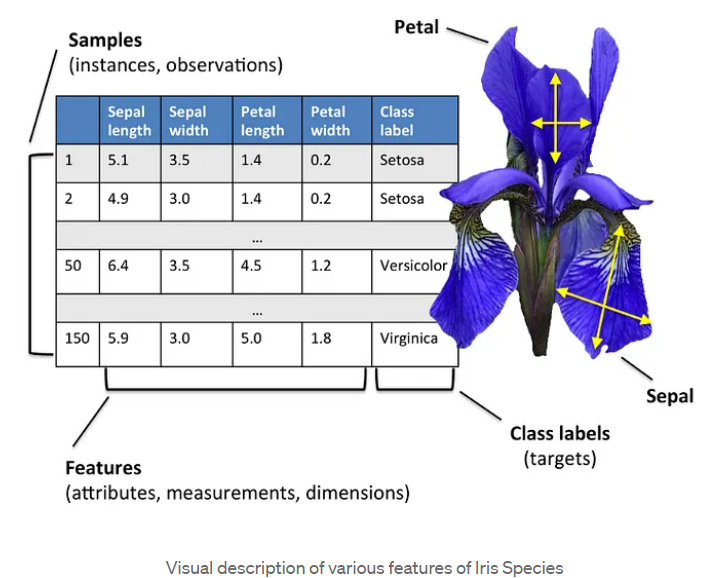

## Importation des bibliothéques nécessaires

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Data visualization libraires
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
# show plot in the notebook
%matplotlib inline

In [ ]:
#Importing algorithms
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier

# **Prétraitement et exploration des données**

In [ ]:
#Loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" #Make sure to have an Internet connection while loading the data
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)

In [ ]:
#Afficher le nombre de lignes et de colonnes dans le dataset
print("Le Nombre de lignes est egale à", data.shape[0])
print("Le Nombre de colonnes est egale à  ", data.shape[1])

Le Nombre de lignes est egale à 150
Le Nombre de colonnes est egale à   5


In [ ]:
#Afficher les 10 premieres lignes du dataset
print("les 10 premieres lignes du dataset : ")
print(data.head(10))


les 10 premieres lignes du dataset : 
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [ ]:
#Afficher les 10 derniéres lignes du dataset
print("les 10 derniéres lignes du dataset : ")
print(data.tail(10))

les 10 derniéres lignes du dataset : 
     sepal-length  sepal-width  petal-length  petal-width           class
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica
143           6.8          3.2           5.9          2.3  Iris-virginica
144           6.7          3.3           5.7          2.5  Iris-virginica
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [ ]:
#Afficher un résumé statistique du dataset ( mean, std, count...)
print("résumé statistique du dataset")
print(data.describe())


résumé statistique du dataset
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Vérfication des doublons

In [ ]:
#Vérifier les doublons dans le dataset
duplicates = data[data.duplicated()]
print("Nombre de lignes dupliquées : ", duplicates.shape[0])

# Afficheage
if duplicates.shape[0] > 0:
    print("Lignes dupliquées : ")
    print(duplicates)

Nombre de lignes dupliquées :  3
Lignes dupliquées : 
     sepal-length  sepal-width  petal-length  petal-width           class
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica


### Vérification du nombre d'observation par classe

In [ ]:
#Afficher le nombre d'observation par classe
class_counts = data['class'].value_counts()
print("Nombre d'observations par classe : ")
print(class_counts)

Nombre d'observations par classe : 
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


### Visualization des données

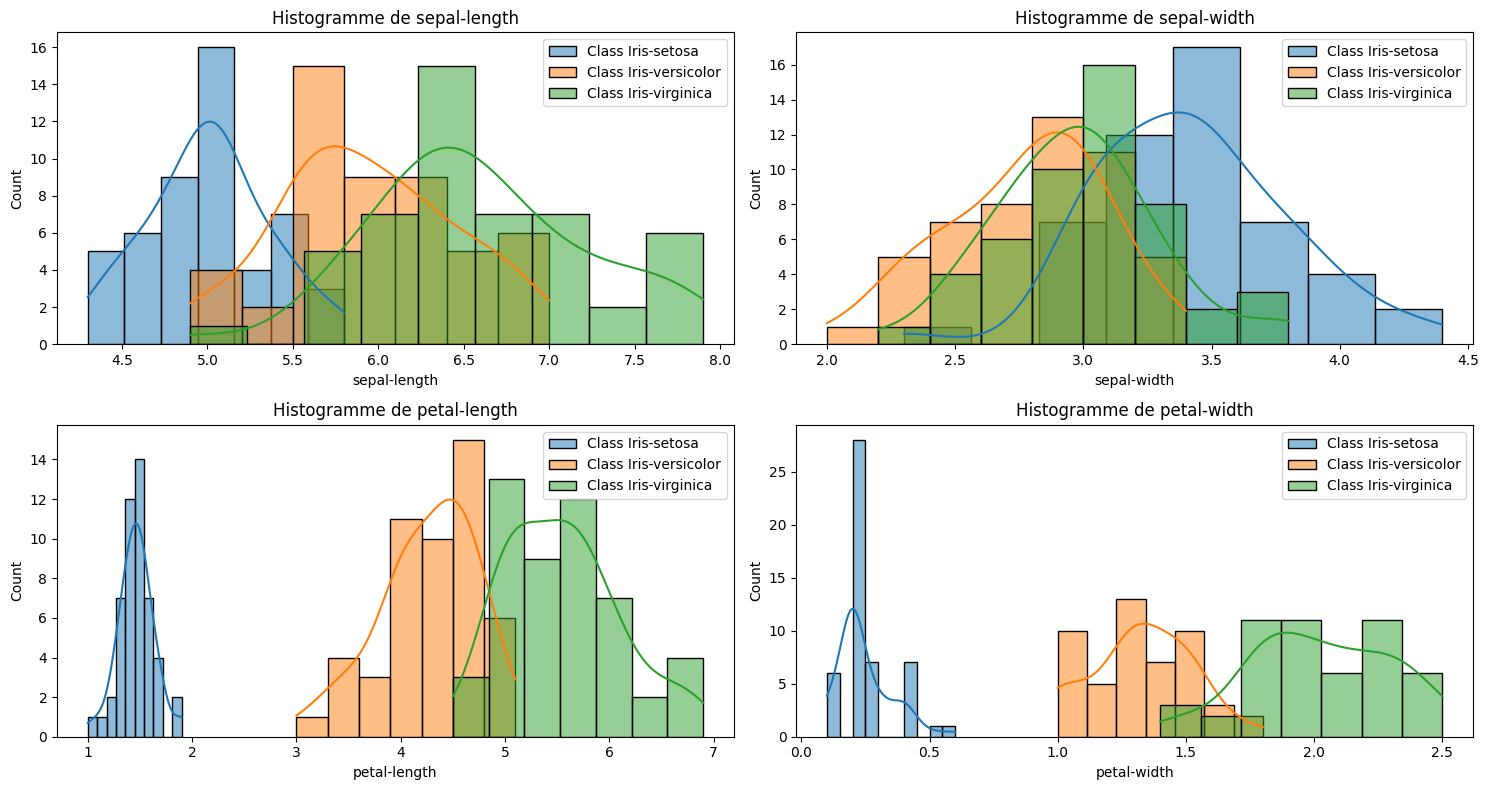

In [ ]:
#Visualizer les caractéristiques des différentes catégories des fleurs d'iris (sepal-length,	sepal-width,	petal-length,	petal-width)
#afficher au minimum trois graphiques ( boites à moustaches, nuage de points ...)

#Graph 1
# Visualisation : Histogrammes pour chaque caractéristique par classe
plt.figure(figsize=(15, 8))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    for flower_class in data['class'].unique():
        sns.histplot(data[data['class'] == flower_class][column], kde=True, label=f'Class {flower_class}')
    plt.title(f'Histogramme de {column}')
    plt.legend()
plt.tight_layout()
plt.show()

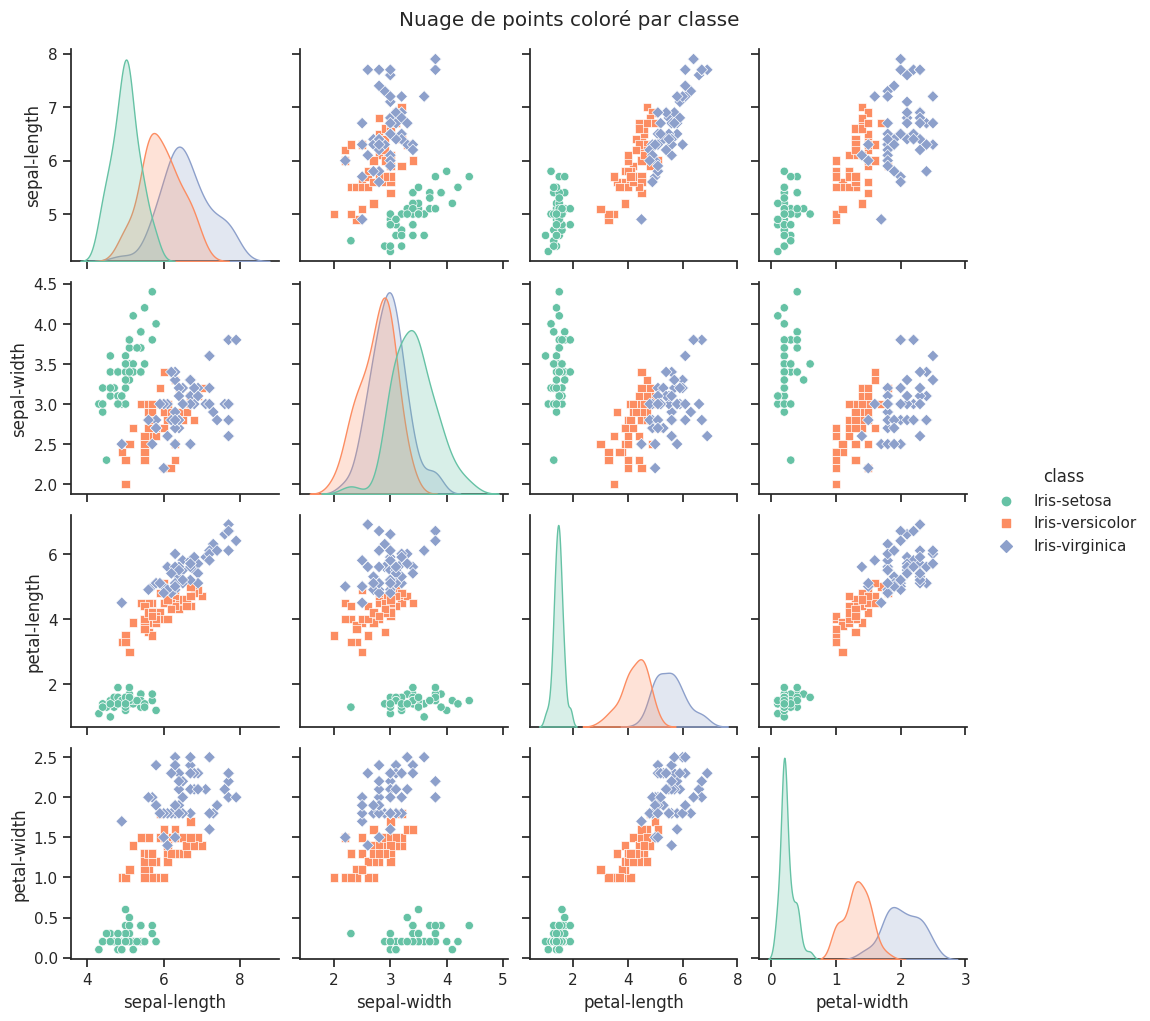

In [ ]:
#Graph 2
# Visualisation : Nuage de points pour chaque paire de caractéristiques avec des couleurs distinctes par classe
sns.set(style="ticks")
sns.pairplot(data, hue='class', palette='Set2', markers=["o", "s", "D"], diag_kind='kde')
plt.suptitle('Nuage de points coloré par classe', y=1.02)
plt.show()

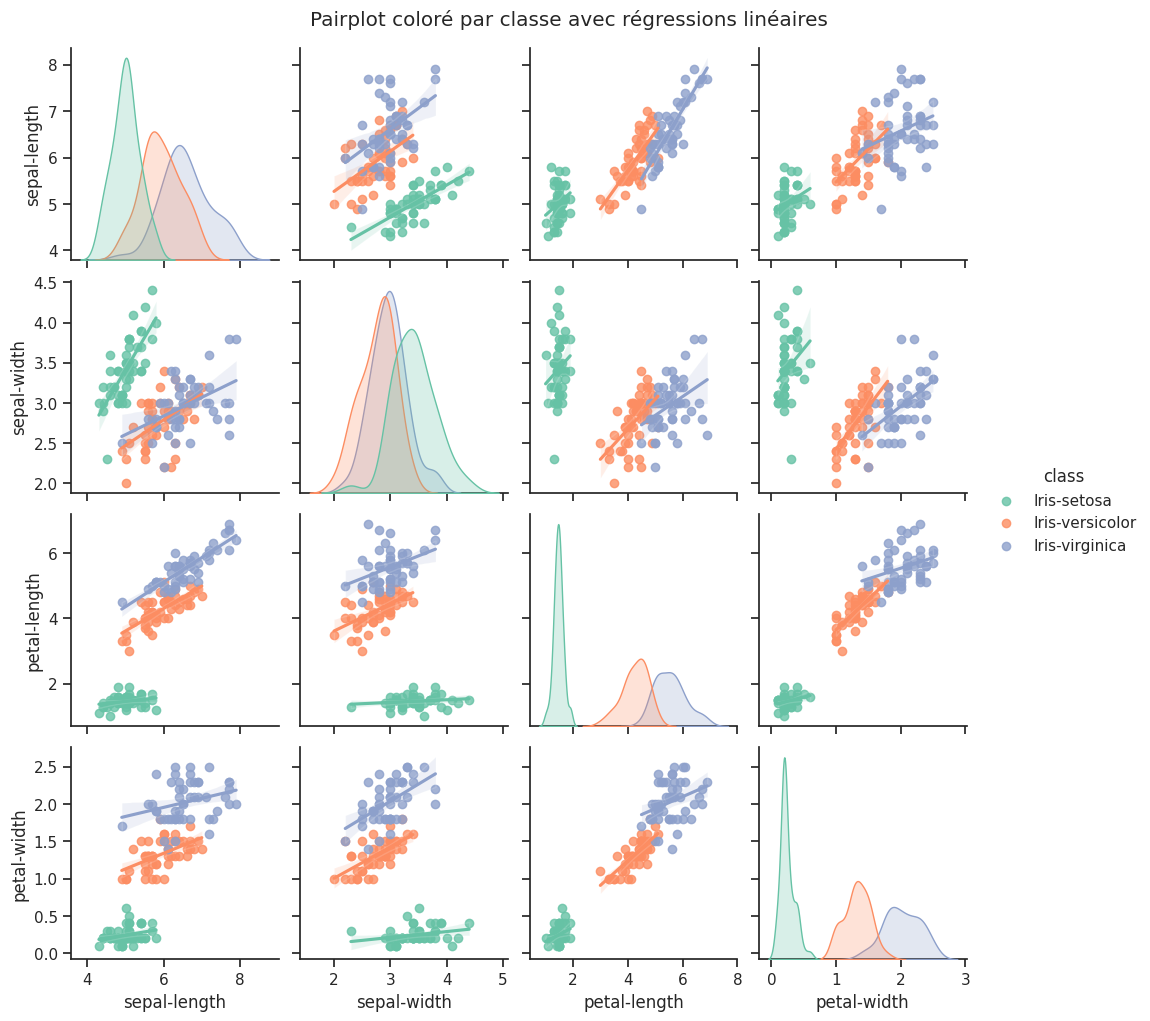

In [ ]:
#Graph 3
# Visualisation : Pairplot coloré par classe avec des régressions linéaires
sns.pairplot(data, hue='class', palette='Set2', kind='reg')
plt.suptitle('Pairplot coloré par classe avec régressions linéaires', y=1.02)
plt.show()

<ipython-input-14-4b92bf0f9a10>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


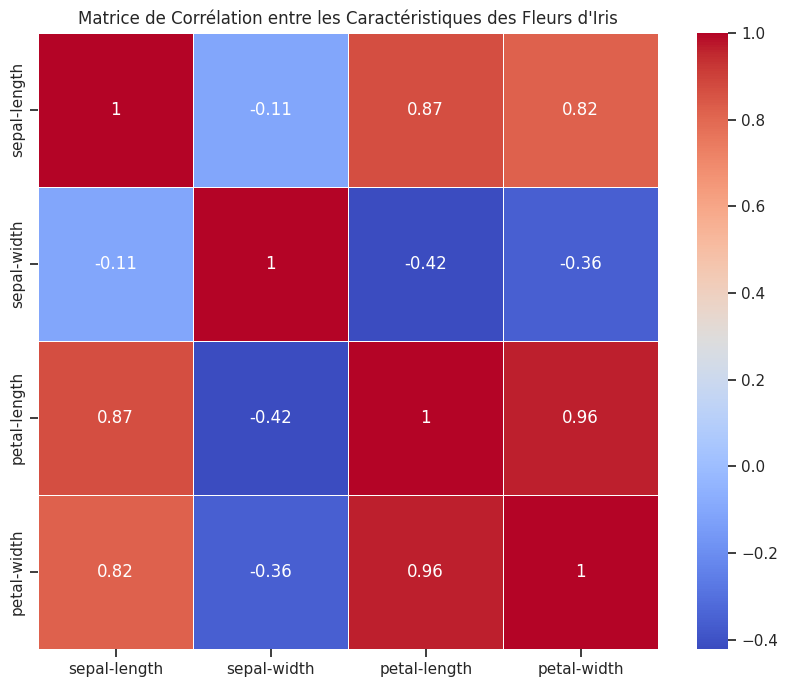

In [ ]:
#afficher la corrélation entre les caractéristiques des fleurs d'iris
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de Corrélation entre les Caractéristiques des Fleurs d\'Iris')
plt.show()

## **1/ Clustering**

In [ ]:
# Séparer les variables et la classe cible
array = data.values
X = array[:, 0:4] # les varaiables
Y = array[:, 4] #la classe cible

### L'algorithme K-means

Utiliser la méthode du coude pour déterminer le nombre optimal de clusters pour l'algorithme k-means

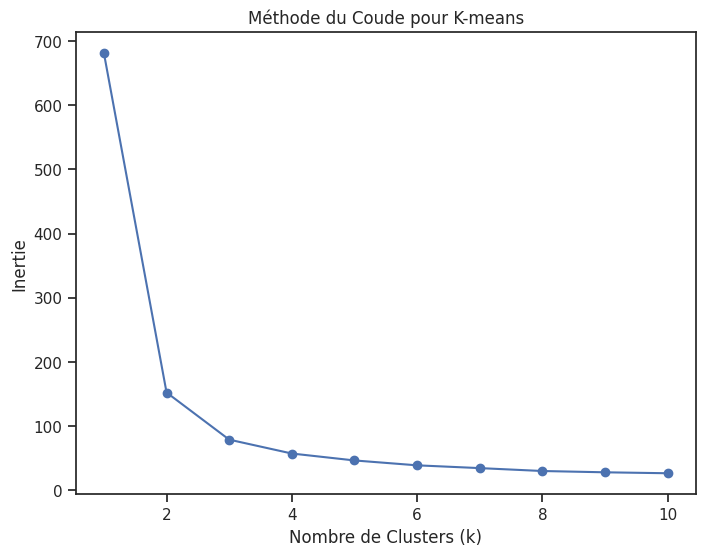

In [ ]:
#code
# Utiliser la méthode du coude pour déterminer le nombre optimal de clusters
inertia = []
possible_k_values = range(1, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Définir n_init explicitement
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Tracer le graphique du coude
plt.figure(figsize=(8, 6))
plt.plot(possible_k_values, inertia, marker='o', linestyle='-', color='b')
plt.title('Méthode du Coude pour K-means')
plt.xlabel('Nombre de Clusters (k)')
plt.ylabel('Inertie')
plt.show()

Centres des clusters :
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Distribution des observations par cluster :
0    62
1    50
2    38
Name: cluster, dtype: int64


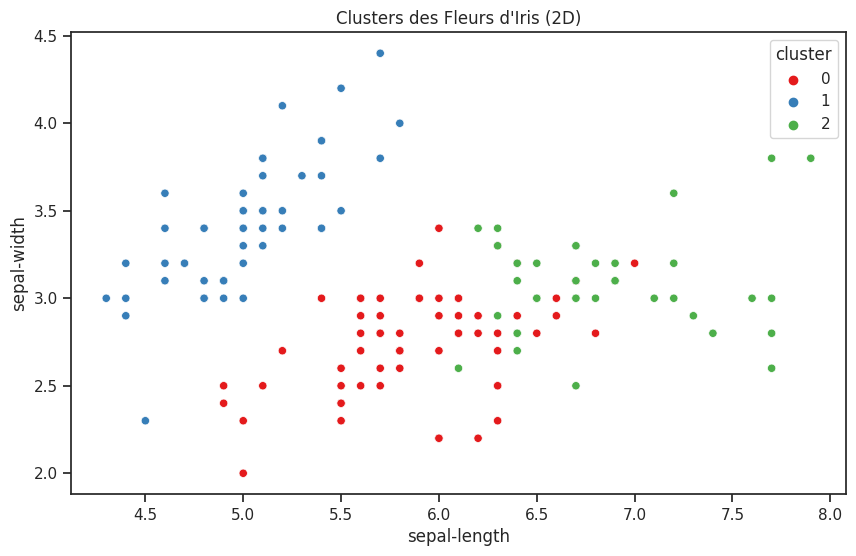

In [ ]:
#apprentissage avec l'algorithme k-means
# Choisissez le nombre optimal de clusters (k) en fonction du graphique du coude
optimal_k = 3  # Remplacez par le nombre optimal que vous avez déterminé

# Entraînement de l'algorithme K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X)

# Ajouter les étiquettes des clusters au jeu de données
data['cluster'] = kmeans.labels_

# Afficher les centres des clusters
print("Centres des clusters :")
print(kmeans.cluster_centers_)

# Afficher la distribution des observations par cluster
print("Distribution des observations par cluster :")
print(data['cluster'].value_counts())

# Visualiser les clusters (2D)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal-length', y='sepal-width', hue='cluster', data=data, palette='Set1', legend='full')
plt.title('Clusters des Fleurs d\'Iris (2D)')
plt.show()


## Visualization des clusters de K-means

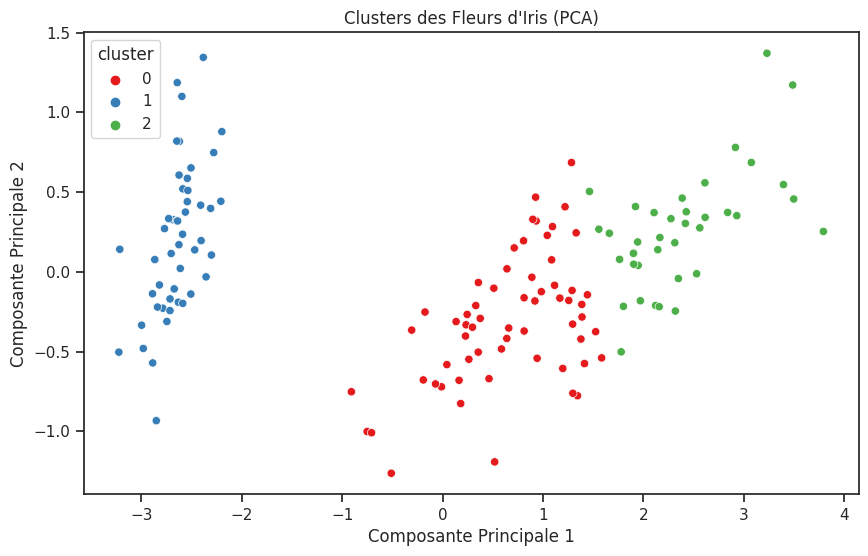

In [ ]:
#Visualiser les clusters
from sklearn.decomposition import PCA

# Réduire la dimension des données à 2 pour la visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Ajouter les étiquettes des clusters au jeu de données
data['cluster'] = kmeans.labels_

# Visualiser les clusters dans l'espace 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['cluster'], palette='Set1', legend='full')
plt.title('Clusters des Fleurs d\'Iris (PCA)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()


## Visualization des classes réelles

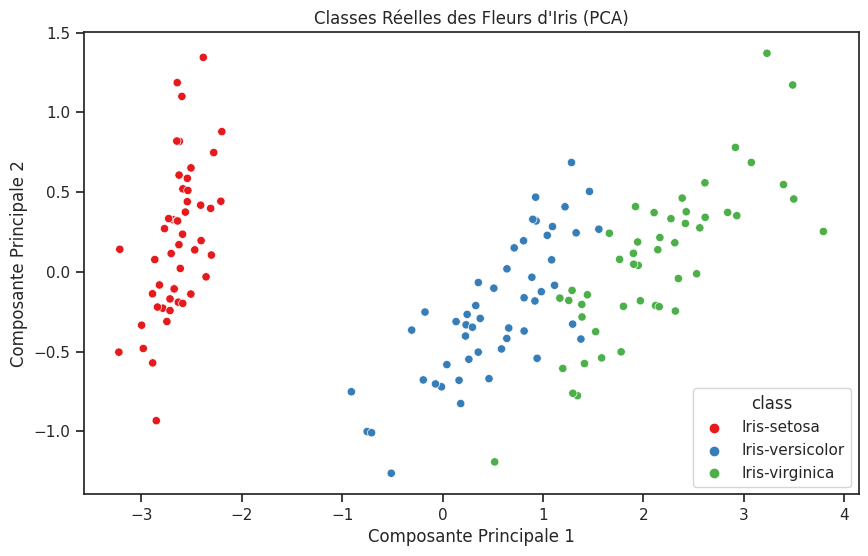

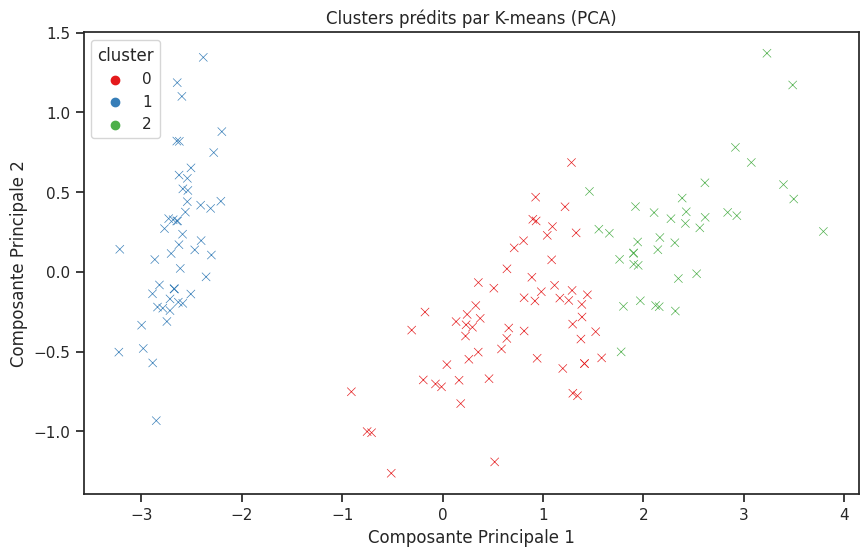

In [ ]:
#Comparer le graphique des groupes de l'algorithme K-means avec le graphiques des classes réelles définies dans le dataset.
# Visualiser les classes réelles du dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['class'], palette='Set1', legend='full', marker='o')
plt.title('Classes Réelles des Fleurs d\'Iris (PCA)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()

# Comparer avec les clusters prédits par K-means
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['cluster'], palette='Set1', legend='full', marker='x')
plt.title('Clusters prédits par K-means (PCA)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()


### **2/ Classification**

## Régression logistique

In [ ]:
#code
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialisation du modèle de régression logistique
logreg_model = LogisticRegression(random_state=42)

# Entraînement du modèle
logreg_model.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
Y_pred = logreg_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Affichage des résultats
print("Précision (Accuracy) : {:.2f}%".format(accuracy * 100))
print("\nMatrice de Confusion :")
print(conf_matrix)
print("\nRapport de Classification :")
print(class_report)


Précision (Accuracy) : 100.00%

Matrice de Confusion :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Rapport de Classification :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### a/ Evaluation par Cross validation

In [ ]:
# Initialisation du modèle de régression logistique avec un nombre maximal d'itérations plus élevé
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Évaluation par validation croisée (cross-validation)
cv_scores = cross_val_score(logreg_model, X, Y, cv=5)  # 5-fold cross-validation

# Affichage des résultats
print("Scores de validation croisée :")
print(cv_scores)
print("\nPrécision moyenne : {:.2f}%".format(cv_scores.mean() * 100))


Scores de validation croisée :
[0.96666667 1.         0.93333333 0.96666667 1.        ]

Précision moyenne : 97.33%


### b/ Evaluation par Train-Test Split

In [ ]:
#code
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialisation du modèle de régression logistique
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Entraînement du modèle sur l'ensemble d'entraînement
logreg_model.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
Y_pred = logreg_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Affichage des résultats
print("Précision (Accuracy) : {:.2f}%".format(accuracy * 100))
print("\nMatrice de Confusion :")
print(conf_matrix)
print("\nRapport de Classification :")
print(class_report)


Précision (Accuracy) : 100.00%

Matrice de Confusion :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Rapport de Classification :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### c/ Evaluation par kfold validation

In [ ]:
#code
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialisation du modèle de régression logistique
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Définition de la stratégie de validation croisée (k-fold avec k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation par k-fold cross-validation
cv_scores = cross_val_score(logreg_model, X, Y, cv=kfold)

# Affichage des résultats
print("Scores de validation croisée :")
print(cv_scores)
print("\nPrécision moyenne : {:.2f}%".format(cv_scores.mean() * 100))


Scores de validation croisée :
[1.         1.         0.93333333 0.96666667 0.96666667]

Précision moyenne : 97.33%


In [ ]:
# Appliquer au minimum trois algorithmes de classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialisation des modèles
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
knn_model = KNeighborsClassifier(n_neighbors=3)  # Utilisez le nombre de voisins approprié
svm_model = SVC(kernel='linear', random_state=42)

# Liste des modèles
models = [logreg_model, knn_model, svm_model]

# Entraînement et évaluation de chaque modèle
for model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Évaluation du modèle
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    class_report = classification_report(Y_test, Y_pred)

    # Affichage des résultats
    print(f"Modèle : {type(model).__name__}")
    print("Précision (Accuracy) : {:.2f}%".format(accuracy * 100))
    print("\nMatrice de Confusion :")
    print(conf_matrix)
    print("\nRapport de Classification :")
    print(class_report)
    print("\n" + "="*50 + "\n")  # Juste pour séparer les résultats de chaque modèle dans l'affichage


Modèle : LogisticRegression
Précision (Accuracy) : 100.00%

Matrice de Confusion :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Rapport de Classification :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Modèle : KNeighborsClassifier
Précision (Accuracy) : 100.00%

Matrice de Confusion :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Rapport de Classification :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      mac

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialisation du modèle k-NN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Utilisez le nombre de voisins approprié

# Entraînement du modèle
knn_model.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
Y_pred_knn = knn_model.predict(X_test)

# Évaluation du modèle k-NN
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
conf_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
class_report_knn = classification_report(Y_test, Y_pred_knn)

# Affichage des résultats pour k-NN
print("Modèle k-NN :")
print("Précision (Accuracy) : {:.2f}%".format(accuracy_knn * 100))
print("\nMatrice de Confusion :")
print(conf_matrix_knn)
print("\nRapport de Classification :")
print(class_report_knn)
print("\n" + "="*50 + "\n")


Modèle k-NN :
Précision (Accuracy) : 100.00%

Matrice de Confusion :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Rapport de Classification :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30





## Forêt d’arbre de décision

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation du modèle de forêt d'arbres de décision
rf_model = RandomForestClassifier(random_state=42)

# Entraînement du modèle
rf_model.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
Y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle de forêt d'arbres de décision
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
class_report_rf = classification_report(Y_test, Y_pred_rf)

# Affichage des résultats pour la forêt d'arbres de décision
print("Modèle de forêt d'arbres de décision :")
print("Précision (Accuracy) : {:.2f}%".format(accuracy_rf * 100))
print("\nMatrice de Confusion :")
print(conf_matrix_rf)
print("\nRapport de Classification :")
print(class_report_rf)
print("\n" + "="*50 + "\n")


Modèle de forêt d'arbres de décision :
Précision (Accuracy) : 100.00%

Matrice de Confusion :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Rapport de Classification :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30





## Arbre de décision

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialisation du modèle d'arbre de décision
dt_model = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
dt_model.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
Y_pred_dt = dt_model.predict(X_test)

# Évaluation du modèle d'arbre de décision
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
conf_matrix_dt = confusion_matrix(Y_test, Y_pred_dt)
class_report_dt = classification_report(Y_test, Y_pred_dt)

# Affichage des résultats pour l'arbre de décision
print("Modèle d'arbre de décision :")
print("Précision (Accuracy) : {:.2f}%".format(accuracy_dt * 100))
print("\nMatrice de Confusion :")
print(conf_matrix_dt)
print("\nRapport de Classification :")
print(class_report_dt)
print("\n" + "="*50 + "\n")


Modèle d'arbre de décision :
Précision (Accuracy) : 100.00%

Matrice de Confusion :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Rapport de Classification :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30





## Machine à vecteurs de support

In [ ]:
#Utiliser VotingClassifier()
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialisation des modèles individuels
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
knn_model = KNeighborsClassifier(n_neighbors=3)  # Utilisez le nombre de voisins approprié
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='linear', random_state=42)

# Initialisation du modèle de VotingClassifier
voting_model = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('knn', knn_model),
    ('rf', rf_model),
    ('svm', svm_model)
], voting='hard')  # 'hard' pour le vote majoritaire

# Entraînement du modèle VotingClassifier
voting_model.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
Y_pred_voting = voting_model.predict(X_test)

# Évaluation du modèle VotingClassifier
accuracy_voting = accuracy_score(Y_test, Y_pred_voting)
conf_matrix_voting = confusion_matrix(Y_test, Y_pred_voting)
class_report_voting = classification_report(Y_test, Y_pred_voting)

# Affichage des résultats pour le VotingClassifier
print("Modèle VotingClassifier :")
print("Précision (Accuracy) : {:.2f}%".format(accuracy_voting * 100))
print("\nMatrice de Confusion :")
print(conf_matrix_voting)
print("\nRapport de Classification :")
print(class_report_voting)
print("\n" + "="*50 + "\n")


Modèle VotingClassifier :
Précision (Accuracy) : 100.00%

Matrice de Confusion :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Rapport de Classification :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30





### Evaluation du modéle finale

In [ ]:
# 1/ afficher le meilleur résultat ( meilleur algorithme )

# Précisions des modèles individuels
accuracies = {
    'k-NN': accuracy_knn,
    'Random Forest': accuracy_rf,
    'Decision Tree': accuracy_dt,
    'Voting Classifier': accuracy_voting
}

# Trouver le meilleur modèle
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

# Afficher les résultats
print("Précisions des modèles individuels :")
for model, accuracy in accuracies.items():
    print(f"{model}: {accuracy:.2f}%")

print("\nMeilleur modèle :")
print(f"{best_model} avec une précision de {best_accuracy:.2f}%")




# 2/ afficher la matrice de confusion

#acc= accuracy_score( #Y_predicted, #Y_test)
#print( "Accuracy score is ",acc)

Précisions des modèles individuels :
k-NN: 1.00%
Random Forest: 1.00%
Decision Tree: 1.00%
Voting Classifier: 1.00%

Meilleur modèle :
k-NN avec une précision de 1.00%


### Prédiction

In [ ]:
#Réaliser la classification de ce nouvel exemple en utilisant votre meilleur algorithme de classification sur le dataset Iris.

#Input  :4.7, 3.2, 1.3, 0.2
#Output :Iris Setosa

fleur_a=[[4.7, 3.2, 1.3, 0.2]]

In [ ]:
#code
#print(class_fleur_a)

# Utilisation du modèle de Régression logistique
logreg_model = LogisticRegression(random_state=42)

# Entraînement du modèle
logreg_model.fit(X_train, Y_train)

# Prédiction sur la nouvelle fleur
prediction = logreg_model.predict(fleur_a)

# Affichage de la prédiction
print("Prédiction de la classe de la fleur :", prediction[0])

Prédiction de la classe de la fleur : Iris-setosa
